In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
data = pd.read_csv('hair_loss.csv')
lda = LinearDiscriminantAnalysis()
X = data.drop('hair_fall', axis=1)
y = data.hair_fall
X_lda = lda.fit_transform(X ,y)
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)

In [6]:
print(X_lda)

[[ 0.0747465  -0.4585721  -0.18990074  1.74525724  0.04079187]
 [-0.04948061 -2.83669469  1.5417529   0.15337293  0.71382374]
 [ 0.32683076 -1.91987293 -0.07308999  0.18658163 -0.10023036]
 ...
 [-0.67094536 -1.96364576  0.33653341 -1.05989869 -0.48764126]
 [-0.10491235 -1.20586812 -0.13562202  0.55687562  1.00579833]
 [ 1.32469498 -0.77516504  0.55724545  0.04086917 -0.59839391]]


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Vorhersagen für das Testset
y_pred = rf_classifier.predict(X_test)

# Evaluierung der Genauigkeit
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.17


In [9]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[917, 833, 886, 789, 785, 826],
       [916, 875, 855, 799, 783, 796],
       [839, 866, 897, 809, 750, 765],
       [863, 846, 920, 774, 713, 877],
       [925, 860, 877, 777, 709, 864],
       [870, 846, 889, 823, 756, 825]])

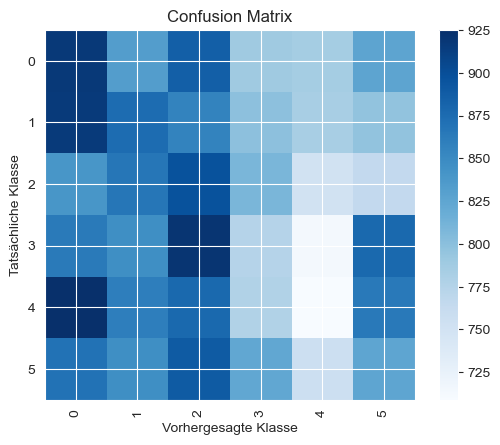

In [10]:
classes = np.unique(y_train)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xticks(rotation='vertical')

plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.show()

In [11]:
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.17      0.18      0.18      5036
           1       0.17      0.17      0.17      5024
           2       0.17      0.18      0.18      4926
           3       0.16      0.16      0.16      4993
           4       0.16      0.14      0.15      5012
           5       0.17      0.16      0.17      5009

    accuracy                           0.17     30000
   macro avg       0.17      0.17      0.17     30000
weighted avg       0.17      0.17      0.17     30000

